## Data Mining and Machine Learning
##  Multiple Regression and Feature selection
### Edgar   Acuna
#### February 2020

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from math import log,pi
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
#Ejemplo 1: Variable de respuesta mpg: millaje por galon, variables predictoras: wt, vol,sp y hp
data1=pd.read_csv("http://academic.uprm.edu/eacuna/millaje.txt",sep="\s+")
data1.head()

,mpg,sp,wt,vol,hp
0,65.4,96,17.5,89,49
1,56.0,97,20.0,92,55
2,55.9,97,20.0,92,55
3,49.0,105,20.0,92,70
4,46.5,96,20.0,92,53


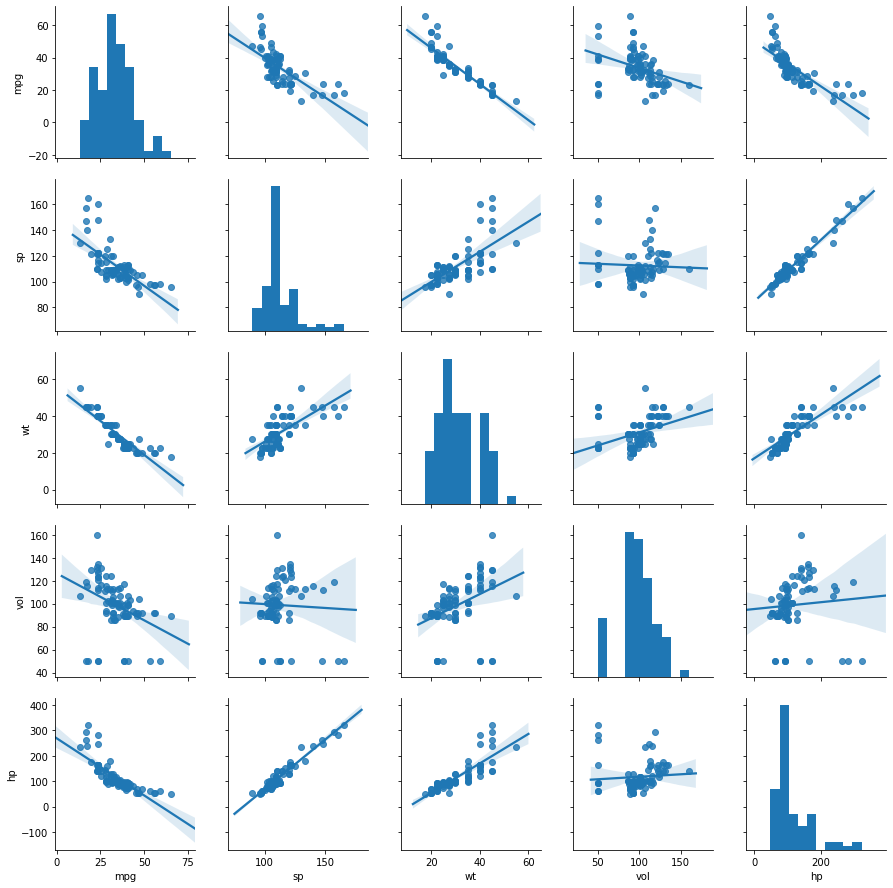

In [4]:
#Haciendo el sactterplot matricial usando seaborn
sns.pairplot(data1,kind="reg")

In [5]:
data1.corr()

,mpg,sp,wt,vol,hp
mpg,1.000000,-0.688446,-0.905085,-0.368614,-0.789856
sp,-0.688446,1.000000,0.678534,-0.043062,0.966545
wt,-0.905085,0.678534,1.000000,0.384954,0.832220
vol,-0.368614,-0.043062,0.384954,1.000000,0.076479
hp,-0.789856,0.966545,0.832220,0.076479,1.000000


Comentario: La variable predictora mas correlacionada con la variable de espuesta mpg es wt y la menos correlacionada es vol 

In [6]:
#haciendo la regresion de mpg con las 4 variables predictoras
regall=smf.ols(formula='mpg~sp+wt+vol+hp',data=data1).fit()
print(regall.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     132.7
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           9.98e-34
Time:                        10:15:37   Log-Likelihood:                -220.00
No. Observations:                  82   AIC:                             450.0
Df Residuals:                      77   BIC:                             462.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.4378     23.532      8.178      0.0

Comentario: 

Interpretacion de los coeficientes:

B1=-1.2948 significa que si la velocidad maxima aumenta en una unidad(m/h)se espera que el rendimiento en millas por galon baje en 1.29 asumiendo que las otras variables permanecen constante.

B2=-1.85 significa que si el peso del carro aumenta en una unidad (100 lb)se espera que el rendimiento en millas por galon disminuya en 1.85 asumiendo que las otras variables permanecen constante.

B3=-.01 significa que si el volumen interior del carro aumenta en una unidad (pie cubico) se espera que el rendimiento en millas por galon disminuya en .01 asumiendo que las otras variables permanecen constante.

B4=0.39 significa que si la potencia del motor aumenta en una unidad se espera que que el rendimiento en millas por galon aumente  en .39 asumiendo que las otras variables permanecen constante.

Notar que el p-value de la prueba de t para la variable vol es mayor que .05 lo cual indica que dicha
    variable no es importante para predecir el mpg

In [7]:
reg3=smf.ols(formula='mpg~sp+wt+hp',data=data1).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           8.66e-35
Time:                        10:15:37   Log-Likelihood:                -220.25
No. Observations:                  82   AIC:                             448.5
Df Residuals:                      78   BIC:                             458.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    194.1296     23.322      8.324      0.0

In [8]:
#Prediccion usando el modelo de regresion
pred=regall.predict(pd.DataFrame({'sp': [100], 'wt':[20], 'vol': [100], 'hp': [50]}))
print("El mpg predicho es:",pred[0])

El mpg predicho es: 43.80594564647063


In [9]:
#calculo del criterio de Akaike usando todas las predictoras para seleccion de variables
sse=regall.ssr
akaike=82*(log(2*pi*sse/77)+1)+5
print(akaike)

450.16489916086744


In [10]:
#Hallando el AIC del modelo de regresion sin incluir la variable wt
regall=smf.ols(formula='mpg~sp+vol+hp',data=data1).fit().aic
print(regall)

504.298793532117


In [11]:
#Hallando el AIC del modelo de regresion sin incluir la variable sp
regall=smf.ols(formula='mpg~wt+vol+hp',data=data1).fit().aic
print(regall)

473.4251275963891


In [12]:
#Hallando el AIC del modelo de regresion sin incluir la variable hp
regall=smf.ols(formula='mpg~sp+wt+vol',data=data1).fit().aic
print(regall)

469.6093107206202


In [13]:
#Hallando el AIC del modelo de regresion sin incluir la variable Vol
regall=smf.ols(formula='mpg~sp+wt+hp',data=data1).fit().aic
print(regall)

448.50475981531577


In [14]:
#Hallando el AIC del modelo de regresion sin incluir las variables Vol y hp
regall=smf.ols(formula='mpg~sp+wt',data=data1).fit().aic
print(regall)

470.3810224204052


In [15]:
#Hallando el AIC del modelo de regresion sin incluir la variable Vol y sp
regall=smf.ols(formula='mpg~wt+hp',data=data1).fit().aic
print(regall)

473.15582702244006


In [16]:
#Hallando el AIC del modelo de regresion sin incluir la variable Vol y wt
regall=smf.ols(formula='mpg~sp+hp',data=data1).fit().aic
print(regall)

514.0802316649641


Comentario: Segun el criterio AIC de Akaike el mejor modelo es aquel que incluye a las variables wt, sp y hp, porque tiene el AIC menor de todos los modelos 

In [17]:
#Funcion auxiliar que para generar una formula excluyendo una variable
def ols_formula(df, dependent_var, excluded_cols):
    '''
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [18]:
def back1(data,best_candidate,response,remaining,current_score):
        scores_with_candidates=[]
        #step 2
        data1=data.drop(best_candidate,axis=1)
        for candidate in remaining:
            formula=ols_formula(data1,response,[candidate])
            score = smf.ols(formula, data1).fit().aic
            scores_with_candidates.append((score,candidate))
        scores_with_candidates.sort(reverse=True)
        worst_new_score, best_candidate = scores_with_candidates.pop()
        print("Feature considered for elimination in this step:",best_candidate) 
        if current_score>worst_new_score:
            remaining.remove(best_candidate)
            current_score = worst_new_score
        return remaining, current_score

In [19]:
#Funcion para hacer backward selection 
def backward_elimination(data,response):
    #Step 0
    formula=ols_formula(data,response,"")
    result = smf.ols(formula, data).fit().aic
    remaining = list(data.columns)
    remaining.remove(response)
    current_score, worst_new_score = result, result
    print('AIC including all the features\n', current_score)
    scores_with_candidates = []
    #Step 1
    for candidate in remaining:
        formula=ols_formula(data,response,[candidate])
        score = smf.ols(formula, data).fit().aic
        scores_with_candidates.append((score,candidate))
    scores_with_candidates.sort(reverse=True)
    worst_new_score, best_candidate = scores_with_candidates.pop()
    print("Feature considered for elimination in this step:",best_candidate, "\nAIC",worst_new_score,"\n")   
    if current_score<worst_new_score:
        print(" Ended at step 1: all the features are important")
    else:
        remaining.remove(best_candidate)
        current_score = worst_new_score
        aic1=current_score
        #print "ac1", aic1
        for step in range (0,8):
            back1(data,best_candidate,response,remaining,current_score)
            formula = "{} ~ {} + 1".format(response, ' + '.join(remaining))
            aic2=smf.ols(formula, data).fit().aic
            #print "aic2", aic2
            if aic2>=aic1:
                break
            else:
                aic1=aic2
                print ("AIC=",aic1)
    print("best AIC:", aic1, "\n","Best Features:", remaining)
    formula = "{} ~ {} + 1".format(response, ' + '.join(remaining))
    print(formula)
    model = smf.ols(formula, data).fit()
    return model

In [20]:
backward_elimination(data1,'mpg')

AIC including all the features
 450.0059654772008
Feature considered for elimination in this step: vol 
AIC 448.50475981531577 

Feature considered for elimination in this step: hp
best AIC: 448.50475981531577 
 Best Features: ['sp', 'wt', 'hp']
mpg ~ sp + wt + hp + 1


In [21]:
#Ejemplo 2: variable de respuesta grasa: porcentaje de grasa en el cuerpo, variable predictoras: edad, peso,
#altura y circunferencias de cuello, pecho, cadera,abdomen, biceps, muslo,rodilla,tobillo,antebrazo y muneca 
data2=pd.read_csv("http://academic.uprm.edu/eacuna/grasa.txt",sep="\s+")
predictors=data2.columns.drop("grasa")
print(predictors)
#data2.head()

Index(['edad', 'peso', 'altura', 'cuello', 'pecho', 'abdomen', 'cadera',
       'muslo', 'rodilla', 'tobillo', 'biceps', 'antebrazo', 'muneca'],
      dtype='object')


In [22]:
regall=smf.ols(formula="grasa~edad+peso+altura+cuello+pecho+abdomen+cadera+muslo+rodilla+tobillo+biceps+antebrazo + muneca",data=data2).fit()
print(regall.summary())

                            OLS Regression Results                            
Dep. Variable:                  grasa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           7.72e-64
Time:                        10:15:38   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [23]:
model=backward_elimination(data2,"grasa")
print(model)

AIC including all the features
 1464.502374462249
Feature considered for elimination in this step: rodilla 
AIC 1462.5065971242952 

Feature considered for elimination in this step: pecho
AIC= 1460.5713060353653
Feature considered for elimination in this step: altura
AIC= 1459.0662610790037
Feature considered for elimination in this step: tobillo
AIC= 1457.8221707488633
Feature considered for elimination in this step: biceps
AIC= 1456.9963819805987
Feature considered for elimination in this step: cadera
best AIC: 1456.9963819805987 
 Best Features: ['edad', 'peso', 'cuello', 'abdomen', 'cadera', 'muslo', 'antebrazo', 'muneca']
grasa ~ edad + peso + cuello + abdomen + cadera + muslo + antebrazo + muneca + 1


In [24]:
backbest=smf.ols(formula='grasa ~ edad + peso + cuello + abdomen + cadera + muslo + antebrazo + muneca',data=data2).fit()
print(backbest.summary())

                            OLS Regression Results                            
Dep. Variable:                  grasa   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     89.47
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           4.92e-68
Time:                        10:15:40   Log-Likelihood:                -719.50
No. Observations:                 252   AIC:                             1457.
Df Residuals:                     243   BIC:                             1489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.6564     11.714     -1.934      0.0

In [25]:
print('R2=', backbest.rsquared)

R2= 0.7465540223833473


In [26]:
#Haciendo backward elimination usando el modulo mlxtend y scikit-learn
from sklearn.linear_model import LinearRegression
import numpy as np
import itertools
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
X=np.asarray(data1[['sp','wt','vol','hp']])
y=np.asarray(data1['mpg'])
X1=np.asarray(data2[['edad','peso','altura','cuello','pecho','abdomen','cadera','muslo','rodilla','tobillo','biceps','antebrazo','muneca']])
y1=np.asarray(data2['grasa'])
lr = LinearRegression()

In [27]:
#Aplicandolo a millaje
a=SFS(lr, k_features=3, forward=False, floating=False, verbose=0, cv=None)
a.fit(X,y)
a.subsets_

{4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.87327953]),
  'avg_score': 0.873279528640681,
  'feature_names': ('0', '1', '2', '3')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.87250636]),
  'avg_score': 0.8725063568724144,
  'feature_names': ('0', '1', '3')}}

Comentario: Las 3 variables que quedarian serian: sp(0), wt(1) y hp(3). La  variable eliminada es la variable  vol (2) 

In [28]:
#Aplicandolo a grasa
a1=SFS(lr, k_features=5, forward=False, floating=False, verbose=0, cv=None)
a1.fit(X1,y1)
a1.subsets_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.74904997]),
  'avg_score': 0.749049969148275,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12')},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
  'cv_scores': array([0.74904576]),
  'avg_score': 0.7490457640449057,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '9',
   '10',
   '11',
   '12')},
 11: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12),
  'cv_scores': array([0.74898132]),
  'avg_score': 0.7489813153923306,
  'feature_names': ('0', '1', '2', '3', '5', '6', '7', '9', '10', '11', '12')},
 10: {'feature_idx': (0, 1, 3, 5, 6, 7, 9, 10, 11, 12),
  'cv_scores': array([0.7484878]),
  'avg_score': 0.748487803260692,
  'feature_names': ('0', '1', '3', '5', '6', '7', '9', '10', '11', '12')},
 9: {'feature_idx': (0, 1, 3, 5, 6, 7, 10, 11, 12),
  'cv_scores': array([0.74

Comentario: las 5 variables que quedarian serian: edad(0), peso(1), abdomen(5), antebrazo(11) y muneca(12)

In [29]:
#Eligiendo la predictora mejor correlacionada con mpg y haciendo la regresion
reg1=smf.ols(formula='mpg~wt', data=data1).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     362.4
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.91e-31
Time:                        10:15:41   Log-Likelihood:                -234.58
No. Observations:                  82   AIC:                             473.2
Df Residuals:                      80   BIC:                             478.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.1655      1.867     36.512      0.0

In [30]:
#Considerando la segunda mejor variable junto con la primera
reg2_r2a=smf.ols(formula='mpg~wt+sp', data=data1).fit().rsquared_adj
print(reg2_r2a)

0.8250952146841881


In [31]:
#Considerando la tercera mejor variable
reg3_r2a=smf.ols(formula='mpg~sp+wt+hp', data=data1).fit().rsquared_adj
print(reg3_r2a)

0.8676027552136609


In [32]:
#Considerando la tercera mejor variable
reg3_r2a=smf.ols(formula='mpg~sp+wt+hp+vol', data=data1).fit().rsquared_adj
print(reg3_r2a)

0.8666966470116256


In [33]:
# Haciendo una funcion que seleccione las mejores variables usando Forward pero con el AIC
def forward_aic_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 10000.0, 10000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print(best_new_score, best_candidate)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [34]:
#Aplicando el methodo forward con AIC al dataset millaje
model=forward_aic_selection(data1,"mpg")
print(model.model.formula)
print(model.aic)

473.15904859478167 wt
470.38102242040526 sp
448.50475981531577 hp
450.0059654772008 vol
mpg ~ wt + sp + hp + 1
448.50475981531577


Comentario: La ultima variable vol no es incluida

In [35]:
model=forward_aic_selection(data2,"grasa")
print(model.model.formula)
print(model.aic)

1515.7903374661466 abdomen
1471.184777690264 peso
1465.0412133797465 muneca
1460.219690998677 antebrazo
1459.4418616084486 cuello
1458.8062531638259 edad
1457.0538333098527 muslo
1456.9963819805987 cadera
1457.8221707488633 biceps
grasa ~ abdomen + peso + muneca + antebrazo + cuello + edad + muslo + cadera + 1
1456.9963819805987


In [36]:
#Aplicando el metodo forward con el criterio de r2-ajustado
import statsmodels.formula.api as smf

def forward_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print(best_new_score, best_candidate)
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [37]:
model=forward_selection(data1,"mpg")
print(model.model.formula)
print(model.rsquared_adj)

0.816918470206999 wt
0.8250952146841881 sp
0.8676027552136609 hp
0.8666966470116256 vol
mpg ~ wt + sp + hp + 1
0.8676027552136609


In [38]:
model=forward_selection(data2,"grasa")
print(model.model.formula)
print(model.rsquared)

0.6603187702518141 abdomen
0.7165394550766493 peso
0.72444662153902 muneca
0.7307198635069285 antebrazo
0.7325892393799863 cuello
0.7342913341936386 edad
0.7371456970453198 muslo
0.7382101218856798 cadera
0.7383503647269756 biceps
0.738051612524621 tobillo
grasa ~ abdomen + peso + muneca + antebrazo + cuello + edad + muslo + cadera + biceps + 1
0.747732224159076
